# Histogram Plotting Testing

I'm using acombination of plt.hist(cumulative=-1, density=True,weights=fraction_of_time) to plot, but re-reading the documentation for plt.hist I'm wondering if I'm doing the right thing:

* density bool, default: False

If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).

If stacked is also True, the sum of the histograms is normalized to 1.

* cumulativebool or -1, default: False

If True, then a histogram is computed where each bin gives the counts in that bin plus all bins for smaller values. The last bin gives the total number of datapoints.

If density is also True then the histogram is normalized such that the last bin equals 1.

If cumulative is a number less than 0 (e.g., -1), the direction of accumulation is reversed. In this case, if density is also True, then the histogram is normalized such that the first bin equals 1.

Below I'm doing some simple tests for myself to figure out what's going on.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

In [17]:
test_arr = np.array([0.07,0.12, 0.18, 0.22,0.33, 0.35, 0.37])

In [18]:
bins = np.arange(0,0.5, 0.1)

In [19]:
bins

array([0. , 0.1, 0.2, 0.3, 0.4])

(array([1., 2., 1., 3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4]),
 <BarContainer object of 4 artists>)

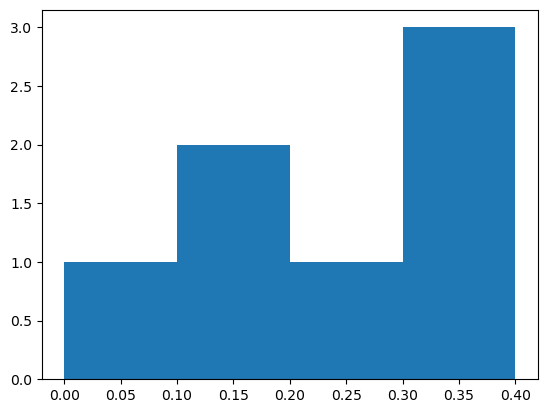

In [20]:
plt.hist(test_arr,bins=bins)

Based on the above, there should be 1 in the first bin, 2 in the second bin, 1 in the third bin, and 3 in the fourth bin

Now let's try turning on cumulative

(array([1., 3., 4., 7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4]),
 <BarContainer object of 4 artists>)

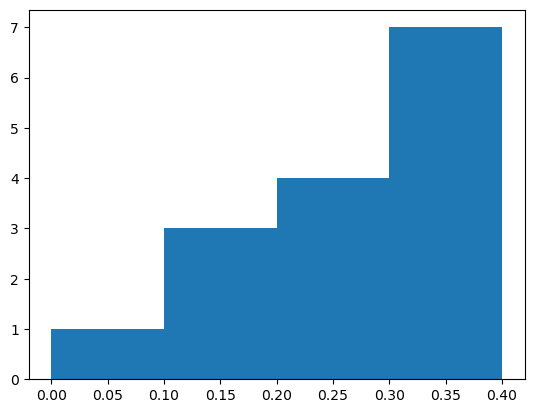

In [21]:
plt.hist(test_arr,bins=bins,cumulative=True)

There should be 7 total, which there are. First bin should have 1, second bin should have 1 + 2 =3, which is does. Third bin has 1+2+1 = 4, which it does. last bin is 1+2+1+3= 7

(array([7., 6., 4., 3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4]),
 <BarContainer object of 4 artists>)

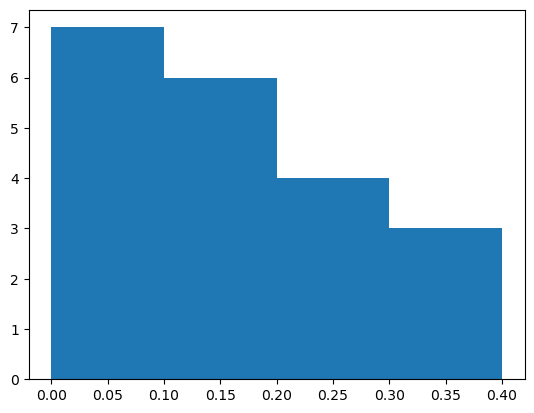

In [22]:
plt.hist(test_arr,bins=bins,cumulative=-1)

The first bin is the counts in that bin, plus all larger counts. So the first bin should be 7, then 2+1+3 = 6, then 1+3=4, then 3, which matches above

Now let's try playing with density.

(array([1.42857143, 2.85714286, 1.42857143, 4.28571429]),
 array([0. , 0.1, 0.2, 0.3, 0.4]),
 <BarContainer object of 4 artists>)

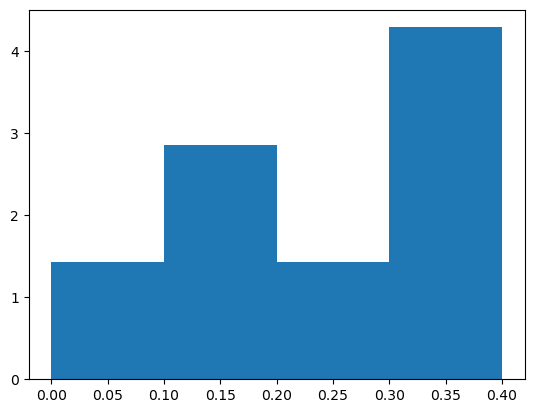

In [23]:
plt.hist(test_arr,bins=bins,density=True)

In [26]:
# bin values
np.array([1,2,1,3])/(7*0.1)

array([1.42857143, 2.85714286, 1.42857143, 4.28571429])

The equation above matchs what I see.

now let's combine density=True and cumulative=True

(array([0.14285714, 0.42857143, 0.57142857, 1.        ]),
 array([0. , 0.1, 0.2, 0.3, 0.4]),
 <BarContainer object of 4 artists>)

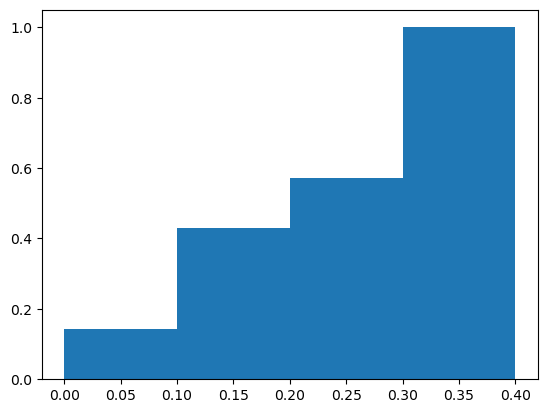

In [27]:
plt.hist(test_arr,bins=bins,density=True ,cumulative=True)

In [28]:
np.array([1., 3., 4., 7.])/7

array([0.14285714, 0.42857143, 0.57142857, 1.        ])

Interesting.... the density=True, cumulative=True behavior is just the straight counts divided by the max. So the behavior doesn't taken into account the bin size. Kind of what I suspected from my initial tests.

Let's try density=True, cumulative=-1

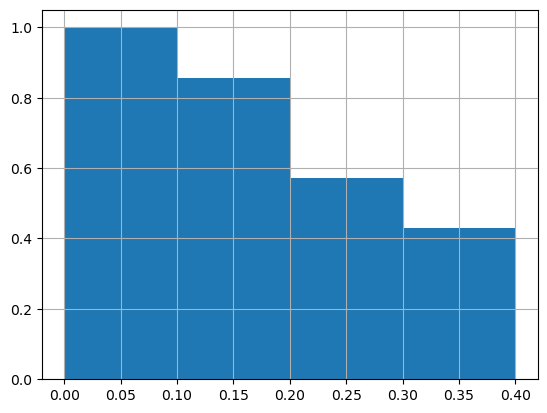

In [34]:
plt.hist(test_arr,bins=bins,density=True ,cumulative=-1)
plt.grid()

In [30]:
np.array([7,6,4,3])/7


array([1.        , 0.85714286, 0.57142857, 0.42857143])

Again, what I expect and the bin size isn't taken into account. So whew.... I think all my plots are correct.